In [1]:
import pandas as pd
from pandas import Series, DataFrame

In [4]:
titanic_df= pd.read_csv('train.csv')

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
'''このデータから有用な知見を得るために、明確な目標があったほうが良いでしょう。いくつか、具体的な問いを設定してみます。
1.) タイタニック号の乗客はどのような人達だったのか？
2.) それぞれの乗客はどのデッキにいたか？また、それは客室の種類とどのような関係にあったか？
3.) 乗客は主にどこから来たのか？
4.) 家族連れか、単身者か？

これらの基本的な問いの後に、さらに深くデータ解析を進めます。
5.) 沈没からの生還者には、どのような要因があったのか？'''

'このデータから有用な知見を得るために、明確な目標があったほうが良いでしょう。いくつか、具体的な問いを設定してみます。\n1.) タイタニック号の乗客はどのような人達だったのか？\n2.) それぞれの乗客はどのデッキにいたか？また、それは客室の種類とどのような関係にあったか？\n3.) 乗客は主にどこから来たのか？\n4.) 家族連れか、単身者か？\n\nこれらの基本的な問いの後に、さらに深くデータ解析を進めます。\n5.) 沈没からの生還者には、どのような要因があったのか？'

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

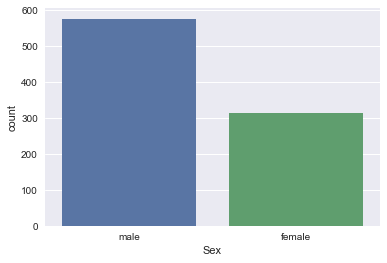

In [10]:
sns.countplot('Sex', data= titanic_df)

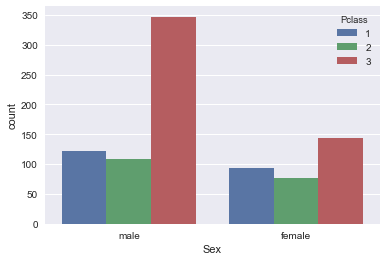

In [11]:
sns.countplot('Sex', data= titanic_df, hue= 'Pclass')

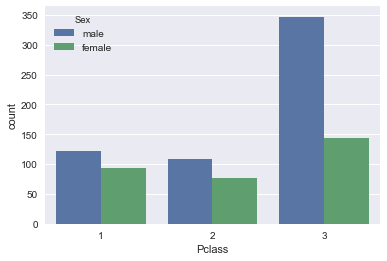

In [12]:
sns.countplot('Pclass', data= titanic_df, hue= 'Sex')

In [14]:
def male_female_child(passenger):
    age, sex= passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [15]:
titanic_df['person']= titanic_df[['Age', 'Sex']].apply(male_female_child, axis= 1)

In [18]:
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [19]:
titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


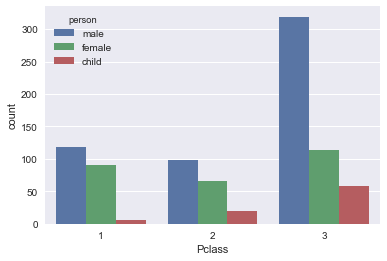

In [20]:
sns.countplot('Pclass', data= titanic_df, hue= 'person')

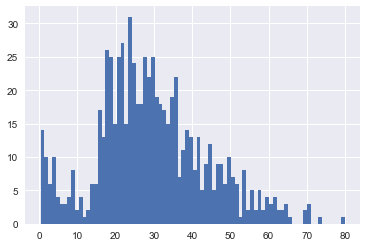

In [25]:
titanic_df['Age'].hist(bins= 80)

In [26]:
titanic_df['Age'].mean()

29.69911764705882

In [27]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

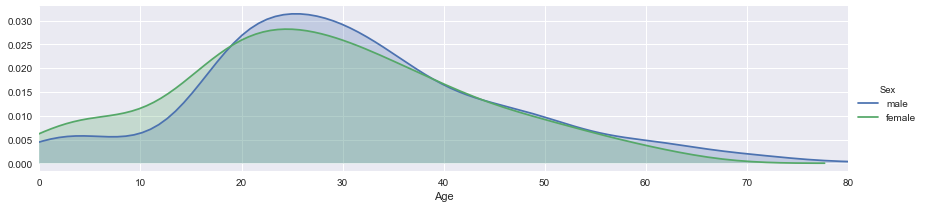

In [35]:
fig= sns.FacetGrid(titanic_df, hue= 'Sex', aspect= 4)
fig.map(sns.kdeplot, 'Age', shade= True)
oldest= titanic_df['Age'].max()
fig.set(xlim= (0, oldest))
fig.add_legend()

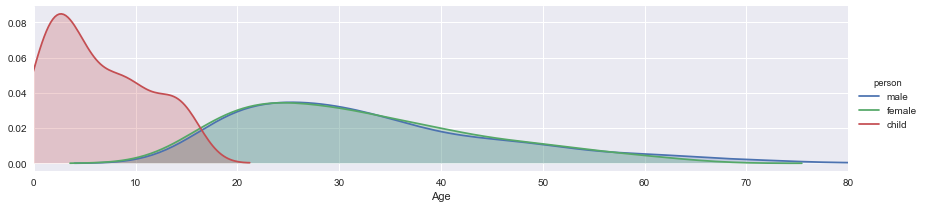

In [36]:
fig= sns.FacetGrid(titanic_df, hue= 'person', aspect= 4)
fig.map(sns.kdeplot, 'Age', shade= True)
oldest= titanic_df['Age'].max()
fig.set(xlim= (0, oldest))
fig.add_legend()

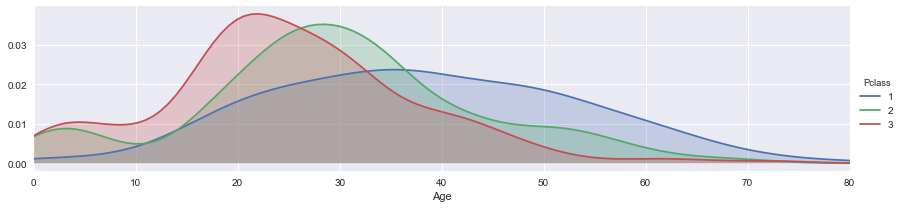

In [37]:
fig= sns.FacetGrid(titanic_df, hue= 'Pclass', aspect= 4)
fig.map(sns.kdeplot, 'Age', shade= True)
oldest= titanic_df['Age'].max()
fig.set(xlim= (0, oldest))
fig.add_legend()

In [38]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [40]:
deck= titanic_df['Cabin'].dropna()

In [41]:
deck

1              C85
3             C123
6              E46
10              G6
11            C103
21             D56
23              A6
27     C23 C25 C27
31             B78
52             D33
54             B30
55             C52
61             B28
62             C83
66             F33
75           F G73
88     C23 C25 C27
92             E31
96              A5
97         D10 D12
102            D26
110           C110
118        B58 B60
123           E101
124            D26
128          F E69
136            D47
137           C123
139            B86
148             F2
          ...     
751           E121
759            B77
763        B96 B98
765            D11
772            E77
776            F38
779             B3
781            B20
782             D6
789        B82 B84
796            D17
802        B96 B98
806            A36
809             E8
815           B102
820            B69
823           E121
829            B28
835            E49
839            C47
849            C92
853         

In [42]:
levels= []

for level in deck:
    levels.append(level[0])
    
    

In [43]:
cabin_df= DataFrame(levels)
cabin_df.columns= ['Cabin']

In [44]:
cabin_df

,Cabin
0,C
1,C
2,E
3,G
4,C
5,D
6,A
7,C
8,B
9,D


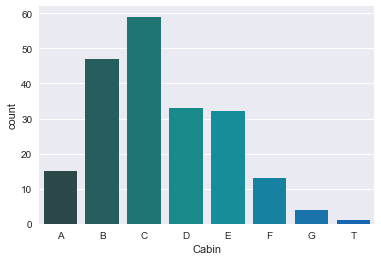

In [45]:
sns.countplot('Cabin', data= cabin_df, palette= 'winter_d', order= sorted(set(levels)))

In [46]:
cabin_df= cabin_df[cabin_df.Cabin != 'T']

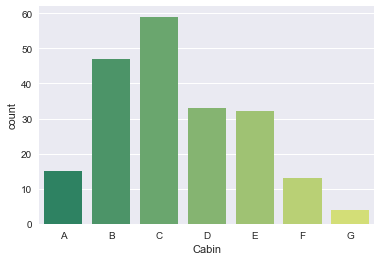

In [47]:
sns.countplot('Cabin', data= cabin_df, palette= 'summer', order= sorted(set(cabin_df['Cabin'])))

In [48]:
titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


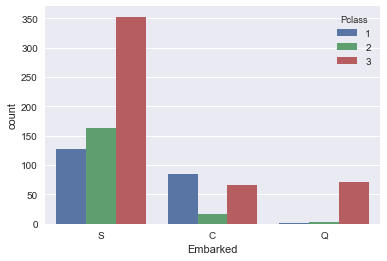

In [49]:
sns.countplot('Embarked', data= titanic_df, hue= "Pclass")

In [50]:
from collections import Counter
Counter(titanic_df, Embarked)

NameError: name 'Embarked' is not defined